# Scientific Computing

### NumPy/SciPy Overview
* NumPy is a library for numeric array manipulations.
* SciPy is a library for scientific computing.
* Their functionality has some overlap but they are mostly distinct.


###  Useful resources
* [Numpy tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)
* Langtangen's books
* [NumPy for Matlab Users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html)
* [SciPy website](http://scipy.org/)


### Installing numpy and scipy

The best way is to use 
```
pip install numpy
pip install scipy
``` 

Anaconda also helps with installation. More details can be found [here](https://scipy.org/install.html).

### Things NumPy is good for 


NumPy has the following features:
+ `ndarray` which handles matrices/vectors/multidimensional arrays.
+ linear algebra, fourier, and random number capabilities. 
+ Reading and writing files
+ interfacing with C/Fortran code

Taken from the [NumPy tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html)

1. Array Creation
 + `arange, array, copy, empty, empty_like, eye, fromfile, fromfunction, identity, linspace, logspace, mgrid, ogrid, ones, ones_like, r, zeros, zeros_like`
2. Conversions
 + `ndarray.astype, atleast_1d, atleast_2d, atleast_3d, mat`
3. Manipulations
 + `array_split, column_stack, concatenate, diagonal, dsplit, dstack, hsplit, hstack, ndarray.item, newaxis, ravel, repeat, reshape, resize, squeeze, swapaxes, take, transpose, vsplit, vstack`
4. Questions
 + `all, any, nonzero, where`
5. Ordering
 + `argmax, argmin, argsort, max, min, ptp, searchsorted, sort`
6. Operations
 + `choose, compress, cumprod, cumsum, inner, ndarray.fill, imag, prod, put, putmask, real, sum`
7. Basic Statistics
 + `cov, mean, std, var`

### Importing NumPy capabilities 

The standard way to import `numpy` functionalities is `import numpy` or use an alias `import numpy as np`. 

In [1]:
import numpy as np

We can also import specific functions from numpy. This may be useful when importing submodules. Example:

In [2]:
from numpy.linalg import  qr, svd, norm

In [3]:
help(np.ndarray)

Help on class ndarray in module numpy:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |

### NumPy Arrays

The `ndarray` class handles multidimensional arrays. Type `help(ndarray)`.

Basics of NumPy arrays
+ all elements must be of the same type -- either all real, or all complex -- for efficient numerical storage
+ the number of elements must be known at the time the array is created 
+ Use multidimensional arrays in different ways - 0D/1D arrays are vectors, 2D arrays are matrices, 3 and higher dimensions are tensors


Let me first illustrate the difference between 0D and 1D vectors

In [38]:
x = np.array([1.,2.,3.]) # 0D array

y = np.array([[1.,2.,3.]]) # 1 x 3 vector 

z = np.array([ [1.],[2.],[3.]]) # 3 x 1 vector

In [39]:
print('x is a 0 D array \n', x)
print('y is a 1 x 3 array \n', y)
print('z is a 3 x 1 array \n', z)

x is a 0 D array 
 [1. 2. 3.]
y is a 1 x 3 array 
 [[1. 2. 3.]]
z is a 3 x 1 array 
 [[1.]
 [2.]
 [3.]]


### Transposes

Use `A.T` for transpose and `A.H` for conjugate transpose (or `A.conj().T`).

In [6]:
print(x.T)  # Still 0D

[1. 2. 3.]


In [7]:
print(y.T)  # now 3 x 1


[[1.]
 [2.]
 [3.]]


In [8]:
print(z.T)  # now 1 x 3

[[1. 2. 3.]]


### Use numpy arrays for matrices

Do not use `numpy.matrix`! Use 2D arrays are matrices. 

In [9]:
A = np.array([[1.,2.,3.,],[4.,5.,6.]])
print('A is \n', A)

A is 
 [[1. 2. 3.]
 [4. 5. 6.]]


There are many ways to create arrays with the desired sizes. Here are three examples. A comprehensive list is given [here](https://docs.scipy.org/doc/numpy/reference/routines.array-creation.html).

In [10]:
A = np.empty([5,3], dtype = 'd')   
B = np.ones([5,3], dtype = 'd')
C = np.zeros([5,3], dtype = 'd')

print(A)

[[0.         0.         0.4472136 ]
 [0.0531494  0.18257419 0.4472136 ]
 [0.2125976  0.36514837 0.4472136 ]
 [0.4783446  0.54772256 0.4472136 ]
 [0.85039041 0.73029674 0.4472136 ]]


In [44]:
A = np.zeros([2,2,2,2,2])
print(A.shape)

(2, 2, 2, 2, 2)


In [49]:
A = np.ones((3,3))
print(A[1,2]) ### Accesses the (2,3) element

1.0


In [ ]:
#### Exercise

1. Write a function to create the $n \times n$ Hilbert matrix
$$ H_{ij} = \frac{1}{i+j-1} \qquad i,j = 1,\dots, n.$$
2. Write a function to create the $n \times n$ minij matrix
$$ M_{ij} = \min\{i,j\} \qquad i,j = 1,\dots, n.$$

In [53]:
def hilbert(n = 3):
    H = np.zeros((n,n), dtype = 'd')
    for i in range(n):
        for j in range(n):
            H[i,j] = 1./(i + j + 1)
    
    return H
           
def minij(n = 3):
    M = np.zeros((n,n), dtype = 'd')
    for i in range(n):
        for j in range(n):
            M[i,j] = min(i+1,j+1)
    
    return M
                         
print(hilbert(3))
print(minij(3))

[[1.         0.5        0.33333333]
 [0.5        0.33333333 0.25      ]
 [0.33333333 0.25       0.2       ]]
[[1. 1. 1.]
 [1. 2. 2.]
 [1. 2. 3.]]


#### Generating arrays using random numbers

`numpy.linalg.randn` generates Normal$(0,1)$ (pseudo)random numbers, and `numpy.linalg.rand` generates Uniform$(0,1)$ (pseudo)random numbers.

In [11]:
A = np.random.randn(5,3)
print('A is \n', A)
B = np.random.rand(3,5)
print('B is \n', B)

A is 
 [[ 0.65739808  0.97692795 -0.58082831]
 [-0.01836641 -1.08555723  1.36855175]
 [ 2.87746839 -1.57384265 -1.3421381 ]
 [-0.82706582 -0.51609634  1.59623781]
 [-1.10131576 -0.0554687  -0.66220934]]
B is 
 [[0.33284047 0.2465579  0.03432392 0.25152707 0.8529079 ]
 [0.31105288 0.40967417 0.77064083 0.54557805 0.87471247]
 [0.16901894 0.33885551 0.41539261 0.4250673  0.96960535]]


### Shape and size

Arrays have attributes such as 
+ shape (tuple, dimensions of the array) and 
+ size (int, total number of elements). 

They can be used in different ways.

In [12]:
A = np.zeros([5,2,3], dtype = 'd')
print('Shape of A is ', A.shape)
print('Size of A is ', A.size)

Shape of A is  (5, 2, 3)
Size of A is  30


In [13]:
x = np.array([1.,2.,3.])
print(x.shape)

(3,)


In [54]:
y = np.array([[1.,2.,3.]])
print(y.shape)

(1, 3)


In [55]:
z = y.T
print(z.shape)

(3, 1)


### Indexing and slicing

Indexing and slicing works very similar to lists.

In [15]:
v = np.random.randn(10)
print('Array \n', v)

Array 
 [-1.42092784 -0.62814042 -1.60840485  1.30722471 -0.64708556  0.48237192
  1.21163033 -0.79873563  1.08886953  0.26879852]


In [16]:
print('First five elements \n', v[:5])

First five elements 
 [-1.42092784 -0.62814042 -1.60840485  1.30722471 -0.64708556]


In [17]:
print('Reverse the array \n', v[::-1])

Reverse the array 
 [ 0.26879852  1.08886953 -0.79873563  1.21163033  0.48237192 -0.64708556
  1.30722471 -1.60840485 -0.62814042 -1.42092784]


In [18]:

print('Every third element \n', v[::3])

Every third element 
 [-1.42092784  1.30722471  1.21163033  0.26879852]


We can slice rows/columns/submatrices. **Warning**: Slicing a row or column from a matrix gives a 0D vector and does not preserve dimension.

In [19]:
A = np.random.rand(4,4)
print('First column is \n ', A[:,0])

First column is 
  [0.11460362 0.07459461 0.51186401 0.50908195]


In [20]:
print('First two rows are \n', A[0:2,:])


First two rows are 
 [[0.11460362 0.35451979 0.37573676 0.68185638]
 [0.07459461 0.03992088 0.14887389 0.60235343]]


In [21]:
print('A 2 x 2 submatrix is \n', A[::2,::2])

A 2 x 2 submatrix is 
 [[0.11460362 0.37573676]
 [0.51186401 0.24238827]]


In [22]:
print(A)

[[0.11460362 0.35451979 0.37573676 0.68185638]
 [0.07459461 0.03992088 0.14887389 0.60235343]
 [0.51186401 0.18410994 0.24238827 0.16034958]
 [0.50908195 0.27302364 0.43401245 0.75902923]]


#### Exercise:

Create an array w with values $[0, 0.1, 0.2, ..., 3]$. Write out `w[:]`, `w[:-2]`, `w[::5]`, `w[2:-2:6]`. Convince yourself in each case that you understand which elements of the array that are printed.

Hint: Check out `numpy.arange`, `numpy.linspace`.

In [58]:
w = np.linspace(0,3,31)
print(w)
w = np.arange(31)*0.1
print(w)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]


In [60]:
print(w[2:-2:6])

[0.2 0.8 1.4 2.  2.6]


### N-Dimensional Grids

The function `numpy.meshgrid` allows constructing n-dimensional arrays from one-dimensional arrays.




Given two arrays x and y of size m and n respectively, `numpy.meshgrid` returns two matrices X and Y with entries 
$$X_{ij} = x_i \qquad Y_{ij} = y_j \qquad i= 1,\dots,m \quad j =1,\dots,m. $$

This is very valuable when plotting two dimensional functions or computing pairwise distances between two sets of points.

In [23]:
x = np.arange(3); y = np.arange(3)
X,Y = np.meshgrid(x,y)
print('X is \n', X)
print('Y is \n', Y)

X is 
 [[0 1 2]
 [0 1 2]
 [0 1 2]]
Y is 
 [[0 0 0]
 [1 1 1]
 [2 2 2]]


#### Example: 

Consider the Hilbert matrix as before
$$ H_{ij} = \frac{1}{i+j-1} \qquad i,j = 1,\dots, n.$$

We can write this efficiently using meshgrid as 

In [24]:
i = np.arange(5)
I,J = np.meshgrid(i,i)
H = 1/(I+J+1)
print(H)

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


### Norms 

Recall the vector norms for $x \in \mathbb{R}^n$

$$ \|x\|_1 = \sum_{j=1}^n |x_i| \qquad \|x\|_2 = \left(\sum_{j=1}^n |x_i|^2 \right)^{1/2} \qquad \|x\|_\infty = \max_{1 \leq j \leq n}|x_i|. $$ 

The function `numpy.linalg.norm` implements both vector and matrix norms.

In [25]:
v = np.random.randn(100)

print('1-norm is ', np.linalg.norm(v,1))
print('2-norm is ', np.linalg.norm(v,2))
print('$\infty$-norm is ', np.linalg.norm(v,np.inf))

1-norm is  76.30887164919181
2-norm is  9.661703718655069
$\infty$-norm is  2.4969611221771726


For practice, we will compute these norms by writing for loops


In [26]:
onenorm = 0.
twonorm = 0.
infnorm = 0.

for j in range(v.size):
    onenorm += np.abs(v[j])
    twonorm += v[j]**2.
    
    infnorm = np.abs(v[j]) if np.abs(v[j]) > infnorm else infnorm

twonorm = np.sqrt(twonorm)

print('1-norm is ', onenorm)
print('2-norm is ', twonorm)
print('$\infty$-norm is ', infnorm)

1-norm is  76.3088716491918
2-norm is  9.661703718655067
$\infty$-norm is  2.4969611221771726


Similarly we can compute several matrix norms using the same function.

In [27]:
A = np.random.rand(5,3)


print('1-norm is ', np.linalg.norm(A,1))
print('2-norm is ', np.linalg.norm(A,2))
print('$\infty$-norm is ', np.linalg.norm(A,np.inf))

1-norm is  3.4781989356333214
2-norm is  2.317757988856076
$\infty$-norm is  2.1745200514823058


#### Exercise: Frobenius norm

Implement the Frobenius norm for $A \in \mathbb{R}^{m\times n}$ three different ways:
$$ \|A\|_F = \left( \sum_{i=1}^m \sum_{j=1}^n a_{ij}^2 \right)^{1/2} = \left(\text{trace}(A^\top A) \right)^{1/2} = \left(\text{trace}(AA^\top) \right)^{1/2}.$$

Check your answer with `numpy.linalg.norm(A, 'fro')`.

### Matrix and vector multiplication

There are two types of vector multiplication
+ inner product $x^\top y$ where $x,y \in \mathbb{R}^n$
+ outer product $xy^\top$ where $x\in\mathbb{R}^m, y \in \mathbb{R}^n$

Matrix multiplication: $C = AB$ where $A \in \mathbb{R}^{m\times n}, B\in\mathbb{R}^{n\times p}$ is given by   
    $$  c_{ij} = \sum_{k=1}^n a_{ik}b_{kj} \qquad i = 1,\dots,m \quad j = 1,\dots,p.$$
    
    
The relevant functions are `numpy.inner`, `numpy.outer`, and `numpy.dot` or `@`.

Note: `*` is reserved for elementwise or Hadamard product.

In [28]:
x = np.random.randn(3); y = np.random.randn(3);
print('Inner product is ', np.inner(x,y))
print('Outer product is \n', np.outer(x,y))

Inner product is  0.3884881153032509
Outer product is 
 [[-0.32185636 -1.33657936  1.09554329]
 [ 0.02732495  0.11347288 -0.0930094 ]
 [-0.17535311 -0.72819237  0.5968716 ]]


In [37]:
A = np.random.rand(3,5); B = np.random.randn(5,2)
print('C = A*B \n', np.dot(A,B))
print('C = A*B \n', A @ B)

C = A*B 
 [[ 0.00638487 -0.12234482]
 [ 0.99212523 -0.23513337]
 [ 2.76619874 -0.27261653]]
C = A*B 
 [[ 0.00638487 -0.12234482]
 [ 0.99212523 -0.23513337]
 [ 2.76619874 -0.27261653]]


## Factorizations

NumPy/SciPy have wrappers to LAPACK libraries and ship with all the standard factorizations
* LU with pivoting
* QR with/without pivoting
* SVD


Let's start with the LU Factorization

This computes a factorization of the form 
$$ A = PLU , $$

where 

 + P is a permutation matrix
 + L is a lower triangular matrix with 1's on the diagonals
 + U is an upper triangular matrix

In [30]:
from scipy.linalg import lu

# LU Factorization
A = np.random.randn(3,3)
p, l, u = lu(A)


print('The lower triangular factor L is \n', l)
print('\n')
print('The upper triangular factor U is \n', u)
print(p)

The lower triangular factor L is 
 [[1.         0.         0.        ]
 [0.22597979 1.         0.        ]
 [0.25274101 0.31149027 1.        ]]


The upper triangular factor U is 
 [[ 0.53635578 -1.32182426 -0.735236  ]
 [ 0.         -1.15316536 -0.09919161]
 [ 0.          0.          0.81602794]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


#### Check that the LU factorization is correct

In [31]:
print('P * L * U is \n', p @ l @ u )
print('The matrix A is \n', A)
print(np.allclose(p @ l @ u, A))

P * L * U is 
 [[ 0.53635578 -1.32182426 -0.735236  ]
 [ 0.12120557 -1.45187092 -0.26534008]
 [ 0.1355591  -0.69327899  0.59930643]]
The matrix A is 
 [[ 0.53635578 -1.32182426 -0.735236  ]
 [ 0.12120557 -1.45187092 -0.26534008]
 [ 0.1355591  -0.69327899  0.59930643]]
True


### Solving linear systems

In [32]:
from numpy.linalg import solve


A = np.random.randn(100,100)
xt = np.ones((100,))            #Create a true solution
b = A @ xt                      #Create a right hand side b
 

x = solve(A,b)

print(np.allclose(x,xt))
print('The relative error is ', np.linalg.norm(x-xt)/np.linalg.norm(xt))

True
The relative error is  9.54770416235356e-14


### Vectorization 


Instead of using for loops, we can speed up many calculations using vectorization. The message is that: Avoid for loops when possible, and use numpy's implementations. If you really want to use for loops but it is slow, you can use Cython. 

In [61]:
a = np.random.randn(1000000)
asum = 0.
%time for j in np.arange(a.size): asum += a[j]

%time asum2 = np.sum(a)

CPU times: user 261 ms, sys: 6.08 ms, total: 267 ms
Wall time: 269 ms
CPU times: user 750 µs, sys: 94 µs, total: 844 µs
Wall time: 588 µs


In [34]:
%timeit asum2 = np.sum(a)

418 µs ± 62.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Another example on vectorization with multiple loops. Consider the Hilbert matrix as before. 

In [7]:
def hilbert(n = 3):
    H = np.zeros((n,n), dtype = 'd')
    for i in range(n):
        for j in range(n):
            H[i,j] = 1./(i + j + 1)
    
    return H

%time H = hilbert(3000)

CPU times: user 1.83 s, sys: 31.3 ms, total: 1.86 s
Wall time: 1.87 s


Here's a vectorized version.

In [8]:
def hilbert_vec(n = 3):
    I, J = np.meshgrid(np.arange(n), np.arange(n))
    H = 1./(I+J+1)
    return H
%time H = hilbert_vec(3000)

CPU times: user 105 ms, sys: 91.1 ms, total: 196 ms
Wall time: 197 ms


Bottom line: try to avoid loops and vectorize when possible. This could lead to huge speedups in your code.

## SciPy

Here is a very high level view of `scipy`

+ Special functions (scipy.special)
+ Integration (scipy.integrate)
+ Optimization (scipy.optimize)
+ Interpolation (scipy.interpolate)
+ Fourier Transforms (scipy.fftpack)
+ Signal Processing (scipy.signal)
+ Linear Algebra (scipy.linalg)
+ Compressed Sparse Graph Routines (scipy.sparse.csgraph)
+ Spatial data structures and algorithms (scipy.spatial)
+ Statistics (scipy.stats)
+ Multidimensional image processing (scipy.ndimage)
+ File IO (scipy.io)

I will illustrate some of these capabilities with a couple of examples.

### Interpolation

Taken from Jake VDP's [book](https://jakevdp.github.io/WhirlwindTourOfPython/15-preview-of-data-science-tools.html). 

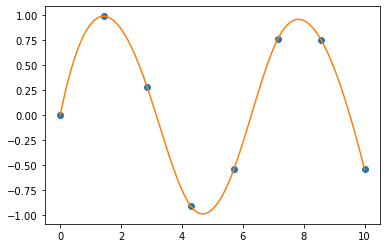

In [35]:
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
# choose eight points between 0 and 10
x = np.linspace(0, 10, 8)
y = np.sin(x)

# create a cubic interpolation function
func = interpolate.interp1d(x, y, kind='cubic')

# interpolate on a grid of 1,000 points
x_interp = np.linspace(0, 10, 1000)
y_interp = func(x_interp)

# plot the results
plt.figure()  # new figure
plt.plot(x, y, 'o')
plt.plot(x_interp, y_interp);

### ODE integration

This example comes from SciPy's website. Pendulum motion, the angular displacement $\theta(t)$ is governed by the second order ODE

$$ \theta''(t) + b\theta'(t) + c\sin(\theta(t)) = 0 ,$$

and can be expressed into a system of ODEs


$$\begin{aligned}
\theta'(t) = & \> \omega(t) \\
\omega'(t) = & \>-b\omega(t) - c\sin(\theta(t)).
\end{aligned}
$$

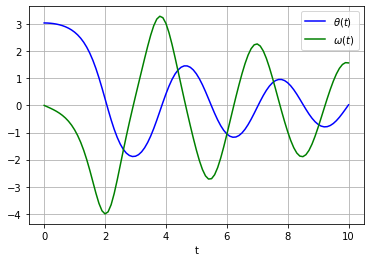

In [36]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

# Constants and the initial conditions

b = 0.25
c = 5.0
y0 = np.array([np.pi - 0.1, 0.0])

# Time limit for the integration
t = np.linspace(0, 10, 101)

# Solve the ODE
from scipy.integrate import odeint
sol = odeint(pend, y0, t, args=(b, c))

# Plot the solution
import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label=r'$\theta(t)$')
plt.plot(t, sol[:, 1], 'g', label=r'$\omega(t)$')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()